In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

In [ ]:
credit_card_data = pd.read_csv('/content/CreditCardDefault.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
credit_card_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43676,41605,-2.124575,0.062763,1.241179,0.314861,-1.429539,-0.257928,-0.601996,0.986393,-0.087686,...,0.347357,0.730357,-0.070482,0.600373,-0.48178,0.470592,-0.275938,-0.166828,88.00,0.0
43677,41605,1.128492,0.154872,0.425385,1.275186,-0.100392,0.140953,-0.051615,0.143311,0.059101,...,-0.054433,0.042567,-0.069599,0.033582,0.62864,-0.329126,0.035518,0.004856,5.00,0.0
43678,41605,-3.062677,3.098384,-4.751905,1.726366,-0.848178,-1.629881,-1.464473,2.601511,-0.579248,...,0.020136,-0.245436,0.081065,-0.323977,-0.26353,-0.371010,0.089257,-0.191195,1.00,0.0
43679,41606,-1.200424,-0.050464,2.319384,0.062695,-0.794518,0.764863,-0.041060,0.418438,0.345849,...,-0.126852,-0.103167,0.003841,0.087676,-0.10108,1.145146,0.163202,0.166503,120.34,0.0
43680,41607,-0.628151,1.125963,1.735514,-0.093631,0.116582,-0.579938,0.887681,-0.204629,-0.198075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43681 entries, 0 to 43680
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    43681 non-null  int64  
 1   V1      43681 non-null  float64
 2   V2      43681 non-null  float64
 3   V3      43681 non-null  float64
 4   V4      43681 non-null  float64
 5   V5      43681 non-null  float64
 6   V6      43681 non-null  float64
 7   V7      43681 non-null  float64
 8   V8      43681 non-null  float64
 9   V9      43681 non-null  float64
 10  V10     43681 non-null  float64
 11  V11     43681 non-null  float64
 12  V12     43681 non-null  float64
 13  V13     43681 non-null  float64
 14  V14     43681 non-null  float64
 15  V15     43681 non-null  float64
 16  V16     43681 non-null  float64
 17  V17     43681 non-null  float64
 18  V18     43680 non-null  float64
 19  V19     43680 non-null  float64
 20  V20     43680 non-null  float64
 21  V21     43680 non-null  float64
 22

In [ ]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
credit_card_data['Class'].value_counts()

0.0    58058
1.0      160
Name: Class, dtype: int64

In [ ]:
normal = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(normal.shape)
print(fraud.shape)

(58058, 31)
(160, 31)


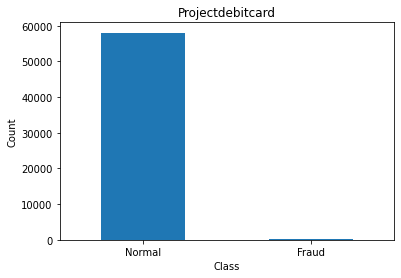

In [ ]:
labels = ["Normal", "Fraud"]
count_classes = credit_card_data.value_counts(credit_card_data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Projectdebitcard")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [ ]:
normal.Amount.describe()

count    58058.000000
mean        95.075782
std        258.742263
min          0.000000
25%          7.712500
50%         26.000000
75%         87.402500
max      12910.930000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     160.000000
mean       93.425687
std       225.763863
min         0.000000
25%         1.000000
50%         4.245000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

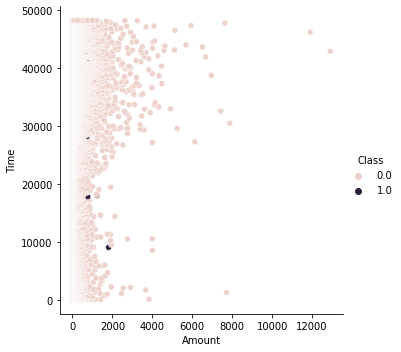

In [ ]:
sns.relplot(x = 'Amount' , y = 'Time' , hue = 'Class', data = credit_card_data)

In [ ]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,31382.796927,-0.219066,-0.022341,0.718437,0.156251,-0.246437,0.108691,-0.095985,0.045435,0.078822,...,0.047001,-0.030102,-0.106286,-0.038911,0.007088,0.135798,0.019387,0.001634,0.003904,95.075782
1.0,28335.375000,-7.165410,5.159692,-9.694508,5.603985,-5.297972,-2.179867,-7.560791,3.478372,-3.399071,...,0.439411,0.864755,-0.209271,-0.269485,-0.077961,0.235786,0.128597,0.572709,0.034909,93.425688


In [ ]:
normal_sample = normal.sample(n=492)

In [ ]:
credit_card_new_data = pd.concat([normal_sample, fraud], axis=0)
credit_card_new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33496,37256,1.223746,0.463144,0.222122,2.105608,0.367452,0.441491,-0.044920,0.141998,-0.811289,...,-0.103814,-0.409572,-0.128096,-0.869576,0.525366,-0.017464,-0.018715,0.001646,5.99,0.0
12397,21727,-0.776074,0.977291,1.515232,2.456017,1.347372,-0.241256,0.536083,0.019492,-0.725748,...,0.081215,0.306825,-0.090719,0.170028,-0.117310,0.063549,0.059638,0.120758,2.88,0.0
8142,11034,-0.670177,0.506706,1.789346,-1.013183,0.246276,-0.026728,0.294783,0.072341,0.921804,...,0.038911,0.195676,-0.233565,-0.494029,-0.059769,0.923479,-0.039892,0.074804,39.00,0.0
5764,6147,-1.115637,0.563109,1.805291,0.264063,1.387784,-1.268535,0.915169,-0.339969,0.327378,...,-0.036375,0.015049,-0.356530,0.469096,0.757990,-0.471484,-0.210588,-0.172957,1.01,0.0
12344,21606,1.274284,0.327607,0.048603,0.659162,0.215033,-0.097529,-0.165115,-0.038729,1.513297,...,-0.476371,-1.133359,0.077905,-0.893836,0.200428,0.140719,-0.040592,0.010500,1.98,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55401,46925,-0.481531,1.059542,0.647117,0.905586,0.819368,-0.091184,0.504135,0.161064,-0.765054,...,0.070633,0.192491,-0.174659,-0.438908,0.239259,-0.217823,-0.072852,0.010463,1.00,1.0
56703,47545,1.176716,0.557091,-0.490800,0.756424,0.249192,-0.781871,0.228750,-0.040840,-0.432111,...,-0.062166,-0.128168,-0.040176,0.110040,0.437891,0.368809,-0.018287,0.031173,0.76,1.0
57248,47826,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,-1.275631,...,-0.083734,-0.346930,-0.050619,0.231044,-0.450760,-0.376205,0.034504,0.157775,7.58,1.0
57470,47923,0.364377,1.443523,-2.220907,2.036985,-1.237055,-1.728161,-2.058582,0.358895,-1.393306,...,0.402730,-0.132129,-0.032977,0.460861,0.560404,0.409366,0.539668,0.296918,0.76,1.0


In [ ]:
credit_card_new_data['Class'].value_counts()

0.0    492
1.0    160
Name: Class, dtype: int64

In [ ]:
X = credit_card_new_data.drop('Class', axis=1)
Y = credit_card_new_data['Class']
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
33496,37256,1.223746,0.463144,0.222122,2.105608,0.367452,0.441491,-0.044920,0.141998,-0.811289,...,-0.138092,-0.103814,-0.409572,-0.128096,-0.869576,0.525366,-0.017464,-0.018715,0.001646,5.99
12397,21727,-0.776074,0.977291,1.515232,2.456017,1.347372,-0.241256,0.536083,0.019492,-0.725748,...,0.061776,0.081215,0.306825,-0.090719,0.170028,-0.117310,0.063549,0.059638,0.120758,2.88
8142,11034,-0.670177,0.506706,1.789346,-1.013183,0.246276,-0.026728,0.294783,0.072341,0.921804,...,0.034898,0.038911,0.195676,-0.233565,-0.494029,-0.059769,0.923479,-0.039892,0.074804,39.00
5764,6147,-1.115637,0.563109,1.805291,0.264063,1.387784,-1.268535,0.915169,-0.339969,0.327378,...,0.027215,-0.036375,0.015049,-0.356530,0.469096,0.757990,-0.471484,-0.210588,-0.172957,1.01
12344,21606,1.274284,0.327607,0.048603,0.659162,0.215033,-0.097529,-0.165115,-0.038729,1.513297,...,-0.188265,-0.476371,-1.133359,0.077905,-0.893836,0.200428,0.140719,-0.040592,0.010500,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55401,46925,-0.481531,1.059542,0.647117,0.905586,0.819368,-0.091184,0.504135,0.161064,-0.765054,...,-0.042515,0.070633,0.192491,-0.174659,-0.438908,0.239259,-0.217823,-0.072852,0.010463,1.00
56703,47545,1.176716,0.557091,-0.490800,0.756424,0.249192,-0.781871,0.228750,-0.040840,-0.432111,...,-0.102772,-0.062166,-0.128168,-0.040176,0.110040,0.437891,0.368809,-0.018287,0.031173,0.76
57248,47826,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,-1.275631,...,-0.268347,-0.083734,-0.346930,-0.050619,0.231044,-0.450760,-0.376205,0.034504,0.157775,7.58
57470,47923,0.364377,1.443523,-2.220907,2.036985,-1.237055,-1.728161,-2.058582,0.358895,-1.393306,...,0.310980,0.402730,-0.132129,-0.032977,0.460861,0.560404,0.409366,0.539668,0.296918,0.76


In [ ]:
Y

33496    0.0
12397    0.0
8142     0.0
5764     0.0
12344    0.0
        ... 
55401    1.0
56703    1.0
57248    1.0
57470    1.0
57615    1.0
Name: Class, Length: 652, dtype: float64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state= 2)

In [ ]:
print(X.shape, X_train.shape,  X_test.shape)

(652, 30) (521, 30) (131, 30)


In [ ]:
model = LogisticRegression()
model.fit(X_train,Y_train)

In [ ]:
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)

print('Accuracy of Training data:', training_data_accuracy)

Accuracy of Training data: 0.9769673704414588


In [ ]:
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)
print('Accuracy of Testing data:', test_data_accuracy)

Accuracy of Testing data: 0.9618320610687023


In [ ]:
print(confusion_matrix(X_test_pred, Y_test))
print(classification_report(X_test_pred, Y_test))

[[97  3]
 [ 2 29]]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       100
         1.0       0.91      0.94      0.92        31

    accuracy                           0.96       131
   macro avg       0.94      0.95      0.95       131
weighted avg       0.96      0.96      0.96       131



In [ ]:
print(classification_report(X_train_pred, Y_train))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       399
         1.0       0.93      0.98      0.95       122

    accuracy                           0.98       521
   macro avg       0.96      0.98      0.97       521
weighted avg       0.98      0.98      0.98       521

